# Visualise a trial raster using matplotlib

```bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221101_115800_event_plotraster.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221101_115800_event_plotraster"
```


### Imports

In [4]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [5]:
import pandas as pd

trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder, _ = os.path.split(os.path.split(os.getcwd())[0])

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params\\tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\kms_pyphotometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'


### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [6]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


### Optional

Transfer Files from hierarchical folders by tasks to flat folders, for photometry and behaviour files

2m 13.9s

If we obtain list of files in source and dest at first and then only perform comparison on them,
This should be much faster

In [8]:
photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

root_folders = [photo_root_dir, pycontrol_root_dir]
horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

copy_files_to_horizontal_folders(root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)

### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [9]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
# pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'

# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

Saved sessions loaded from: sessions.pkl


### Perform extraction of behavioural information by trial (SLOW)

5m55.4s

In [ ]:
# Process the whole experimental folder by trials
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, blank_spurious_event='spout', blank_timelim=[0, 65])

# Save the file as sessions.pkl in folder_path
# exp_cohort.save() # Do I need to save this???


### Match with photometry, videos, and DeepLabCut files (SLOW)

The following Warning : 

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads...

is due to rsync function for photometry-pycontrol alignment

2m10.9s


In [ ]:
# Find if there is a matching photometry file and if it can be used:
# rsync synchronization pulses matching between behaviour and photometry
from copy import deepcopy

# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)

# Find matching videos
exp_cohort.match_sessions_to_files(video_dir, ext='mp4')

# FInd matching DeepLabCut outputs files
exp_cohort.match_sessions_to_files(video_dir, ext='h5', verbose=True)


exp_cohort.save()




In [10]:
# Many combinations possible
conditions_dict0 = {'trigger': 'cued', 'valid': True, 'reward spout cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict1 = {'trigger': 'cued', 'valid': True, 'reward bar cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict2 = {'trigger': 'cued', 'valid': True, 'reward free': True, 'success': True}
conditions_dict3 = {'trigger': 'cued', 'valid': True, 'success': False}
conditions_dict4 = {'trigger': 'uncued', 'valid': True, 'reward spout uncued': True, 'free_reward_timer': False, 'success': True}
conditions_dict5 = {'trigger': 'uncued', 'valid': True, 'reward bar uncued': True, 'free_reward_timer': False, 'success': True}
conditions_dict6 = {'trigger': 'uncued', 'valid': True, 'reward free_uncued': True} # reward after [20, 30] s

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1, conditions_dict2, conditions_dict3, \
                  conditions_dict4, conditions_dict5, conditions_dict6]
# Aliases for conditions
cond_aliases = [
    'Cued, reward at spout, hit', 
    'Cued, reward at bar release, hit', 
    'Cued, Pavlovian, hit', 
    'Cued, miss', \
    'Uncued, reward at spout, hit', 
    'Uncued, reward at bar release, hit',
    'Uncued, miss']

# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)


# Load saved Experiment

4 s

In [11]:
exp_cohort = Experiment(pycontrol_files_path)

Saved sessions loaded from: sessions.pkl


In [12]:

exp_cohort.sessions = [session for session in exp_cohort.sessions
                       if (session.subject_ID in [47, 48, 49, 51, 53]) and (session.number > 2) 
                       and (session.task_name == 'reaching_go_spout_cued_uncued')]

ev_dataset = exp_cohort.behav_events_to_dataset(
    groups=groups,
    conditions_list=condition_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names='reaching_go_spout_cued_uncued',
    trig_on_ev=None)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)


## Visualise a trial PETH using matplotlib

%TODO
- drowdown to change time units


In [13]:
print(len(ev_dataset.metadata_df['keep']))

print(np.count_nonzero(ev_dataset.metadata_df['keep'] == True))


10130
10130


In [14]:
ev_dataset.metadata_df.columns

Index(['trial_nb', 'trigger', 'success', 'valid', 'free_reward_timer',
       'reward spout cued', 'reward bar cued', 'reward bar_off',
       'reward spout uncued', 'reward bar uncued', 'reward free',
       'reward free_uncued', 'cued', 'condition_ID', 'condition', 'group_ID',
       'datetime', 'date', 'session_nb', 'subject_ID', 'keep', 'trial_ID'],
      dtype='object')

In [15]:
dates = ev_dataset.metadata_df['datetime'].apply( lambda x: x.date()  )
set(dates)

{datetime.date(2022, 8, 10),
 datetime.date(2022, 8, 11),
 datetime.date(2022, 8, 22),
 datetime.date(2022, 8, 23),
 datetime.date(2022, 8, 24),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 8, 26),
 datetime.date(2022, 9, 19),
 datetime.date(2022, 9, 20),
 datetime.date(2022, 9, 21),
 datetime.date(2022, 9, 23),
 datetime.date(2022, 9, 26),
 datetime.date(2022, 9, 27),
 datetime.date(2022, 9, 28)}

In [16]:
tf = (ev_dataset.get_tfkeep_subjects(47)) & (ev_dataset.get_tfkeep_dates(date(2022,9,26)))

np.count_nonzero(tf)


325

In [17]:
set(ev_dataset.metadata_df.session_nb[tf])

{27}

In [18]:
ev_dataset.set_keep(tf)


In [19]:
ev_dataset.triggers

['uncued', 'cued']

In [20]:
ev_dataset.data.head()

,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time,hold_start_trial_time,datetime,datetime_string
0,454684,cued,True,True,"[1632, 2086, 2648, 2833, 2878]","[1609, 2019, 2618, 2688, 2848]","[1632, 2087, 2648, 2878]",[-1369],2022-08-10 16:21:59,2022-08-10 16:21:59
1,468046,cued,True,True,"[2608, 3099, 3162, 3829, 4448, 4885, 5038, 995...","[1682, 2623, 3129, 3696, 3845, 4464, 4901, 506...","[1795, 2521, 2608, 3099, 3162, 3829, 4447, 488...","[-1425, 5359]",2022-08-10 16:21:59,2022-08-10 16:21:59
2,570000,cued,True,True,[3392],"[1000, 4894]","[1093, 3392]","[-1107, 3820]",2022-08-10 16:21:59,2022-08-10 16:21:59
3,657676,cued,True,True,"[-1905, -1665, -1331, -1147, -1093, 1599]","[-1827, -1649, -1316, -1114, 1579]","[-1905, -1665, -1331, -1093, 1593]",[],2022-08-10 16:21:59,2022-08-10 16:21:59
4,846167,cued,True,True,[1526],[1509],[1526],[-1436],2022-08-10 16:21:59,2022-08-10 16:21:59


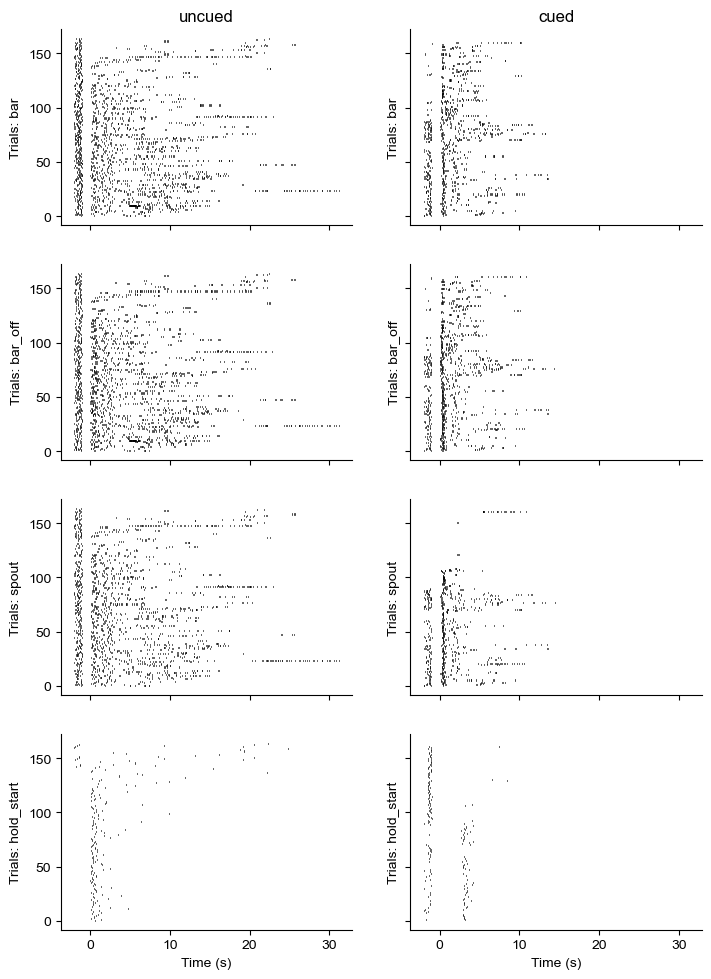

In [29]:

from  matplotlib import pyplot as plt

plt.rcParams['font.family'] = ['Arial']

event_cols = [
    event_col for event_col in ev_dataset.data.columns if '_trial_time' in event_col]
    
event_name_stems = [event_col.split('_trial_time')[0] for event_col in event_cols]

triggers = ev_dataset.triggers

cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(len(event_cols), len(triggers), sharex=True, sharey=True, figsize=(21.0*cm, 29.7*cm))

for trig_idx, trigger in enumerate(triggers):

    df_subset = ev_dataset.data.loc[(ev_dataset.data['trigger'] == trigger) & (ev_dataset.metadata_df['keep']) , :] #only include keep

    df_subset = df_subset.reset_index()

    for ev_idx, event_col in enumerate(event_cols):
        
        for r in range(0,df_subset.shape[0]):
           
            ev_times = df_subset.at[r, event_col]
            
            X = np.array(ev_times)
            X.shape = (1, len(X))
            X = np.tile(X,(2,1))/1000 # ms

            Y = np.array([r, r+1])
            Y.shape = (2,1)
            Y = np.tile(Y, (1, X.shape[1]))

            ax[ev_idx][trig_idx].plot(X, Y, 'k-', linewidth = 0.5)

            plot_names = trigger + ' ' + event_col

            event_name_stem = event_col.split('_trial_time')[0] 

            ax[ev_idx][trig_idx].set_ylabel('Trials: ' + event_name_stem)

            ax[ev_idx][trig_idx].spines['top'].set_visible(False)
            ax[ev_idx][trig_idx].spines['right'].set_visible(False)

    ax[0][trig_idx].set_title(trigger)

    ax[ev_idx][trig_idx].set_xlabel('Time (s)')




# Event_Dataset.plot_raster()

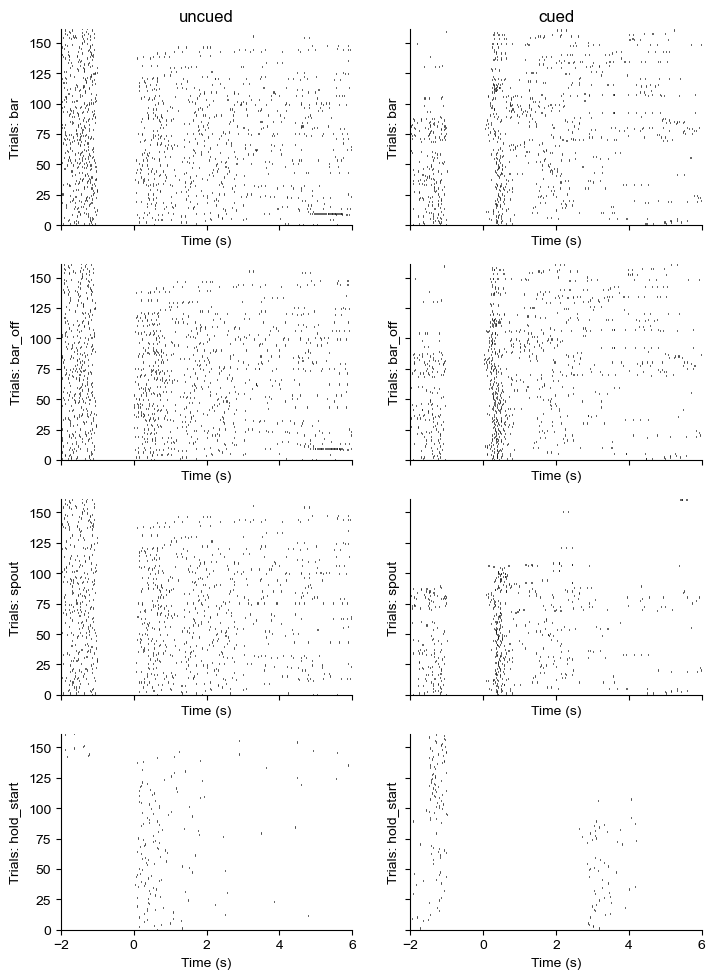

In [109]:
ev_dataset.plot_raster()



## Overlay

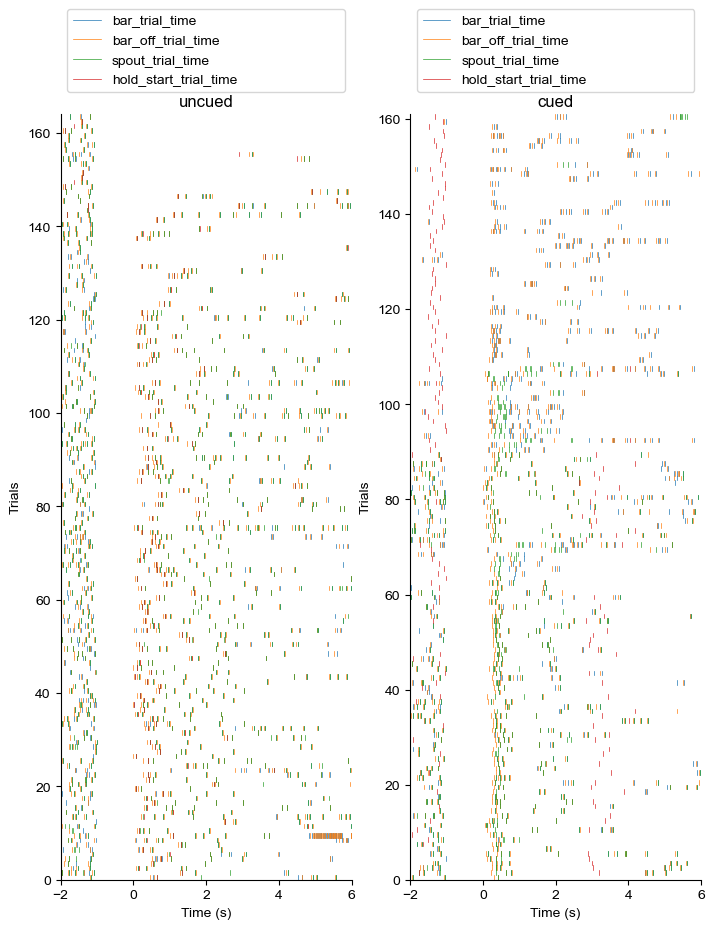

In [108]:
ev_dataset.plot_raster(separate=False)


## specify colors


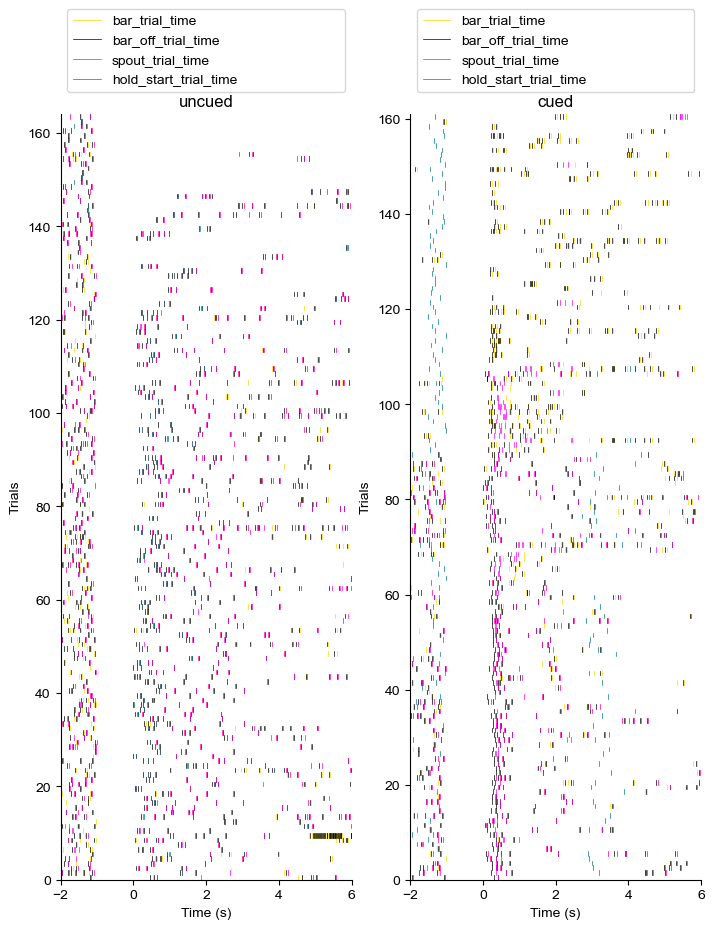

In [107]:

ev_dataset.plot_raster(separate=False, colors = ['gold','k','magenta','teal'])



# Plotly

In [ ]:
ev_dataset.plot_raster(module='plotly')